In [1]:
# Install a conda package in the current Jupyter kernel
import sys

import string
import gensim
from gensim import corpora, models
import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim.models import CoherenceModel
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
%matplotlib inline

# We import sklearn.
import sklearn

import csv
import gc
import pandas as pd
import random

In [2]:
def uniquify(seq, idfun=None): 
   # order preserving
   if idfun is None:
       def idfun(x): return x
   seen = {}
   result = []
   for item in seq:
       marker = idfun(item)
       if marker in seen: continue
       seen[marker] = 1
       result.append(item)
   return result

In [3]:
from datetime import timedelta, date

years = [7,10,11,12,13,14,15,16]


def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)


dates = {}        
for year in years:
    days = []
    year = year + 2000
    start = date(year, 1, 1)
    end = date(year, 12, 31)
    for dt in daterange(start, end):
        days.append(dt.strftime("%m-%d-%Y"))
    dates[year] = days

In [4]:
docs = []
years = [2007,2010,2011,2012,2013,2014,2015]
yearly_docs = {}
BGT_jobID = {}

for year in years:
    for date in dates[year]:
            date_docs = []
            print(date)
            filename = '../../text_data/JobText_US_' + date + '.txt'
            with open(filename) as file:
                i = 0 
                nums = random.sample(range(1, 10000), 5)
                for line in csv.reader(file, dialect="excel-tab"):
                    i += 1
                    if line[0] != '' and i in nums:
                        #BGT_jobID[line[1]] = line[3]
                       #date_docs.append(line[3])
                        docs.append(line[3])
            #date_docs = uniquify(date_docs)
            #docs.append(date_docs)
#     documents = []            
#     for day in docs:
#         for job in day:
#             documents.append(job)
#     documents = uniquify(documents)
#     print(len(documents))
#     with open('../text_data/'+str(year)+'_unique.txt', 'w') as wf:
#         for job in documents:
#             wf.write(job)
#             wf.write('zzz/n')    
#     del documents
#     gc.collect()

01-01-2007
01-02-2007
01-03-2007
01-04-2007
01-05-2007
01-06-2007
01-07-2007
01-08-2007
01-09-2007
01-10-2007
01-11-2007
01-12-2007
01-13-2007
01-14-2007
01-15-2007
01-16-2007
01-17-2007
01-18-2007
01-19-2007
01-20-2007
01-21-2007
01-22-2007
01-23-2007
01-24-2007
01-25-2007
01-26-2007
01-27-2007
01-28-2007
01-29-2007
01-30-2007
01-31-2007
02-01-2007
02-02-2007
02-03-2007
02-04-2007
02-05-2007
02-06-2007
02-07-2007
02-08-2007
02-09-2007
02-10-2007
02-11-2007
02-12-2007
02-13-2007
02-14-2007
02-15-2007
02-16-2007
02-17-2007
02-18-2007
02-19-2007
02-20-2007
02-21-2007
02-22-2007
02-23-2007
02-24-2007
02-25-2007
02-26-2007
02-27-2007
02-28-2007
03-01-2007
03-02-2007
03-03-2007
03-04-2007
03-05-2007
03-06-2007
03-07-2007
03-08-2007
03-09-2007
03-10-2007
03-11-2007
03-12-2007
03-13-2007
03-14-2007
03-15-2007
03-16-2007
03-17-2007
03-18-2007
03-19-2007
03-20-2007
03-21-2007
03-22-2007
03-23-2007
03-24-2007
03-25-2007
03-26-2007
03-27-2007
03-28-2007
03-29-2007
03-30-2007
03-31-2007
04-01-2007

01-16-2011
01-17-2011
01-18-2011
01-19-2011
01-20-2011
01-21-2011
01-22-2011
01-23-2011
01-24-2011
01-25-2011
01-26-2011
01-27-2011
01-28-2011
01-29-2011
01-30-2011
01-31-2011
02-01-2011
02-02-2011
02-03-2011
02-04-2011
02-05-2011
02-06-2011
02-07-2011
02-08-2011
02-09-2011
02-10-2011
02-11-2011
02-12-2011
02-13-2011
02-14-2011
02-15-2011
02-16-2011
02-17-2011
02-18-2011
02-19-2011
02-20-2011
02-21-2011
02-22-2011
02-23-2011
02-24-2011
02-25-2011
02-26-2011
02-27-2011
02-28-2011
03-01-2011
03-02-2011
03-03-2011
03-04-2011
03-05-2011
03-06-2011
03-07-2011
03-08-2011
03-09-2011
03-10-2011
03-11-2011
03-12-2011
03-13-2011
03-14-2011
03-15-2011
03-16-2011
03-17-2011
03-18-2011
03-19-2011
03-20-2011
03-21-2011
03-22-2011
03-23-2011
03-24-2011
03-25-2011
03-26-2011
03-27-2011
03-28-2011
03-29-2011
03-30-2011
03-31-2011
04-01-2011
04-02-2011
04-03-2011
04-04-2011
04-05-2011
04-06-2011
04-07-2011
04-08-2011
04-09-2011
04-10-2011
04-11-2011
04-12-2011
04-13-2011
04-14-2011
04-15-2011
04-16-2011

01-30-2013
01-31-2013
02-01-2013
02-02-2013
02-03-2013
02-04-2013
02-05-2013
02-06-2013
02-07-2013
02-08-2013
02-09-2013
02-10-2013
02-11-2013
02-12-2013
02-13-2013
02-14-2013
02-15-2013
02-16-2013
02-17-2013
02-18-2013
02-19-2013
02-20-2013
02-21-2013
02-22-2013
02-23-2013
02-24-2013
02-25-2013
02-26-2013
02-27-2013
02-28-2013
03-01-2013
03-02-2013
03-03-2013
03-04-2013
03-05-2013
03-06-2013
03-07-2013
03-08-2013
03-09-2013
03-10-2013
03-11-2013
03-12-2013
03-13-2013
03-14-2013
03-15-2013
03-16-2013
03-17-2013
03-18-2013
03-19-2013
03-20-2013
03-21-2013
03-22-2013
03-23-2013
03-24-2013
03-25-2013
03-26-2013
03-27-2013
03-28-2013
03-29-2013
03-30-2013
03-31-2013
04-01-2013
04-02-2013
04-03-2013
04-04-2013
04-05-2013
04-06-2013
04-07-2013
04-08-2013
04-09-2013
04-10-2013
04-11-2013
04-12-2013
04-13-2013
04-14-2013
04-15-2013
04-16-2013
04-17-2013
04-18-2013
04-19-2013
04-20-2013
04-21-2013
04-22-2013
04-23-2013
04-24-2013
04-25-2013
04-26-2013
04-27-2013
04-28-2013
04-29-2013
04-30-2013

02-14-2015
02-15-2015
02-16-2015
02-17-2015
02-18-2015
02-19-2015
02-20-2015
02-21-2015
02-22-2015
02-23-2015
02-24-2015
02-25-2015
02-26-2015
02-27-2015
02-28-2015
03-01-2015
03-02-2015
03-03-2015
03-04-2015
03-05-2015
03-06-2015
03-07-2015
03-08-2015
03-09-2015
03-10-2015
03-11-2015
03-12-2015
03-13-2015
03-14-2015
03-15-2015
03-16-2015
03-17-2015
03-18-2015
03-19-2015
03-20-2015
03-21-2015
03-22-2015
03-23-2015
03-24-2015
03-25-2015
03-26-2015
03-27-2015
03-28-2015
03-29-2015
03-30-2015
03-31-2015
04-01-2015
04-02-2015
04-03-2015
04-04-2015
04-05-2015
04-06-2015
04-07-2015
04-08-2015
04-09-2015
04-10-2015
04-11-2015
04-12-2015
04-13-2015
04-14-2015
04-15-2015
04-16-2015
04-17-2015
04-18-2015
04-19-2015
04-20-2015
04-21-2015
04-22-2015
04-23-2015
04-24-2015
04-25-2015
04-26-2015
04-27-2015
04-28-2015
04-29-2015
04-30-2015
05-01-2015
05-02-2015
05-03-2015
05-04-2015
05-05-2015
05-06-2015
05-07-2015
05-08-2015
05-09-2015
05-10-2015
05-11-2015
05-12-2015
05-13-2015
05-14-2015
05-15-2015

In [5]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/nolan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# stemmer
p_stemmer = PorterStemmer()

In [7]:
documents = []

for i in docs:
    # tokenize text
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = [x.lower() for x in tokenizer.tokenize(i)]

    # remove stop words, numbers, and short words from tokens
    stopped_tokens = [i for i in tokens if not i in stop_words and len(i) > 3 and not i.isdigit()]

    # stem and lemmatize tokens
    stemmed_tokens = [p_stemmer.stem(WordNetLemmatizer().lemmatize(i, pos='v')) for i in stopped_tokens]
    
    # add tokens to list
    documents.append(stopped_tokens)

In [8]:
len(documents)

12560

In [9]:
# turn tokenize documents into a id - term dictionary
dictionary = corpora.Dictionary(documents)

len(dictionary)

56080

In [10]:
# filter out words that are too frequent or too infrequent
dictionary.filter_extremes(no_below=0.02, no_above=0.5, keep_n=100000)
dictionary.save('dictionary_5')
len(dictionary)

56073

In [11]:
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(document) for document in documents]
corpora.MmCorpus.serialize('corpus_5.mm', corpus)

In [12]:
# creating object for LDA model
Lda = gensim.models.ldamodel.LdaModel

def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = Lda(corpus, num_topics=num_topics, id2word=dictionary, passes=20)        
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        print(num_topics)

    return model_list, coherence_values

In [13]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=documents, start=10, limit=51, step=5)

10
15
20
25
30
35
40
45
50


In [14]:
# Can take a long time to run, second half
model_list_2, coherence_values_2 = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=documents, start=55, limit=76, step=5)

55
60
65
70
75


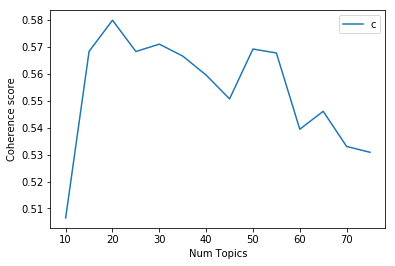

In [15]:
# Show graph
limit=76; start=10; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values + coherence_values_2)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [16]:
# Print the coherence scores
for m, cv in zip(x, coherence_values + coherence_values_2):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 10  has Coherence Value of 0.5065
Num Topics = 15  has Coherence Value of 0.5683
Num Topics = 20  has Coherence Value of 0.5799
Num Topics = 25  has Coherence Value of 0.5683
Num Topics = 30  has Coherence Value of 0.571
Num Topics = 35  has Coherence Value of 0.5666
Num Topics = 40  has Coherence Value of 0.5595
Num Topics = 45  has Coherence Value of 0.5507
Num Topics = 50  has Coherence Value of 0.5692
Num Topics = 55  has Coherence Value of 0.5677
Num Topics = 60  has Coherence Value of 0.5394
Num Topics = 65  has Coherence Value of 0.5461
Num Topics = 70  has Coherence Value of 0.533
Num Topics = 75  has Coherence Value of 0.5309


In [23]:
optimal_model = Lda(corpus, num_topics=20, id2word=dictionary, passes=20)        
optimal_model.save("lda_model_5")

In [ ]:
optimal_model = Lda.load("lda_model_5")
dictionary = dictionary.load('dictionary_5')
corpus = corpora.MmCorpus('corpus_5.mm')

In [24]:
# Visualize the topics
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(optimal_model, corpus, dictionary, mds="tsne")

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
18    -14.915375 -44.374939       1        1  13.457523
10     17.055740 -27.562551       2        1   9.028893
7       2.466674 -19.193085       3        1   8.354517
12    -14.992294  -7.282787       4        1   8.203277
13     -2.753078 -46.609169       5        1   8.014874
11     -8.629909 -36.130722       6        1   7.579695
16     13.010087 -16.783539       7        1   6.486148
19     -2.449612 -28.980202       8        1   5.489457
0      12.025924 -39.045689       9        1   4.691373
15      5.650929  -8.588258      10        1   4.461778
6      -5.323267 -12.732891      11        1   4.371753
14    -15.619489 -18.234142      12        1   3.959158
17    -24.938820 -13.735550      13        1   3.343910
8       2.034115 -37.478333      14        1   2.915420
1     -22.098148 -35.904644      15        1   2.904794
9     -14.265422 -28.461981      16        1   2.514180
3      -7.207185 -21.828417      17        1   1.525615
4      -4.103368  -2.473991      18        1   1.082561
5     -24.905085 -25.260351      19        1   0.963347
2       6.896659 -27.835346      20        1   0.651723, topic_info=      Category          Freq          Term         Total  loglift  logprob
term                                                                      
62     Default  12378.000000         sales  12378.000000  30.0000  30.0000
43     Default  10031.000000          jobs  10031.000000  29.0000  29.0000
100    Default   8809.000000          care   8809.000000  28.0000  28.0000
598    Default   9521.000000        please   9521.000000  27.0000  27.0000
527    Default   7843.000000       contact   7843.000000  26.0000  26.0000
1600   Default   4583.000000      security   4583.000000  25.0000  25.0000
533    Default   7428.000000         email   7428.000000  24.0000  24.0000
646    Default  11189.000000      customer  11189.000000  23.0000  23.0000
284    Default   5530.000000       systems   5530.000000  22.0000  22.0000
64     Default   4913.000000        search   4913.000000  21.0000  21.0000
35     Default   6918.000000        health   6918.000000  20.0000  20.0000
518    Default   8221.000000       support   8221.000000  19.0000  19.0000
14     Default  15147.000000       company  15147.000000  18.0000  18.0000
267    Default  12195.000000      services  12195.000000  17.0000  17.0000
266    Default  12677.000000       service  12677.000000  16.0000  16.0000
97     Default  12469.000000      business  12469.000000  15.0000  15.0000
133    Default   7541.000000   development   7541.000000  14.0000  14.0000
460    Default   5259.000000     technical   5259.000000  13.0000  13.0000
53     Default  13662.000000          must  13662.000000  12.0000  12.0000
617    Default   3778.000000        united   3778.000000  11.0000  11.0000
2763   Default   3680.000000       patient   3680.000000  10.0000  10.0000
765    Default   3507.000000         store   3507.000000   9.0000   9.0000
390    Default  12213.000000   information  12213.000000   8.0000   8.0000
562    Default   4281.000000      software   4281.000000   7.0000   7.0000
75     Default  12620.000000       ability  12620.000000   6.0000   6.0000
196    Default   5599.000000       medical   5599.000000   5.0000   5.0000
611    Default   4002.000000        states   4002.000000   4.0000   4.0000
1973   Default   5168.000000          data   5168.000000   3.0000   3.0000
85     Default   8940.000000         apply   8940.000000   2.0000   2.0000
209    Default   2677.000000       network   2677.000000   1.0000   1.0000
...        ...           ...           ...           ...      ...      ...
10308  Topic20     41.401566  electricians     57.036396   4.7129  -6.1165
809    Topic20     37.378784       michael     48.991844   4.7628  -6.2187
9145   Topic20     52.342163    journeyman     91.109665   4.4790  -5.8820
361    Topic20     69.893

In [25]:
optimal_model.show_topics(num_topics=25)

[(0,
  '0.016*"engineering" + 0.010*"status" + 0.009*"systems" + 0.009*"manufacturing" + 0.008*"equipment" + 0.008*"design" + 0.008*"disability" + 0.008*"employment" + 0.008*"company" + 0.008*"color"'),
 (1,
  '0.024*"accounting" + 0.019*"office" + 0.015*"company" + 0.015*"financial" + 0.015*"data" + 0.015*"finance" + 0.013*"administrative" + 0.012*"legal" + 0.009*"information" + 0.009*"payroll"'),
 (2,
  '0.027*"aerotek" + 0.016*"advertiser" + 0.013*"staffing" + 0.010*"reference" + 0.009*"company" + 0.008*"apply" + 0.008*"contact" + 0.007*"group" + 0.007*"member" + 0.006*"posting"'),
 (3,
  '0.042*"security" + 0.033*"network" + 0.028*"systems" + 0.025*"support" + 0.018*"technical" + 0.016*"services" + 0.016*"technology" + 0.013*"system" + 0.012*"information" + 0.011*"hardware"'),
 (4,
  '0.032*"automotive" + 0.031*"technician" + 0.025*"repair" + 0.018*"parts" + 0.015*"service" + 0.013*"maintenance" + 0.012*"mechanic" + 0.011*"auto" + 0.009*"value" + 0.009*"repairs"'),
 (5,
  '0.030*"u

In [26]:
def format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=documents):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=documents)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,10.0,0.2691,"sales, business, marketing, services, customer...","[global, auto, mall, full, auto, internet, sal..."
1,1,18.0,0.4839,"business, management, project, ability, team, ...","[description, role, title, senior, provider, c..."
2,2,10.0,0.3362,"sales, business, marketing, services, customer...","[associate, partner, b021335, company, name, c..."
3,3,18.0,0.3161,"business, management, project, ability, team, ...","[consultant, b016502, company, name, category,..."
4,4,15.0,0.3730,"middot, school, education, university, student...","[opportunities, title, type, firm, type, locat..."
5,5,17.0,0.6123,"jobs, search, send, apply, email, page, friend...","[source, republican, employment, employer, tru..."
6,6,3.0,0.6833,"security, network, systems, support, technical...","[jtext, dummybgt]"
7,7,3.0,0.6833,"security, network, systems, support, technical...","[jtext, dummybgt]"
8,8,3.0,0.6833,"security, network, systems, support, technical...","[jtext, dummybgt]"
9,9,3.0,0.6833,"security, network, systems, support, technical...","[jtext, dummybgt]"


In [27]:
# Group top 5 sentences under each topic
sent_topics_sorteddf = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.8417,"engineering, status, systems, manufacturing, e...","[journeyman, marine, pipe, fitter, california]"
1,1.0,0.8788,"accounting, office, company, financial, data, ...","[accounting, clerk, category, office, services..."
2,2.0,0.7260,"aerotek, advertiser, staffing, reference, comp...","[restaurant, team, member, crew, annapolis, ma..."
3,3.0,0.8120,"security, network, systems, support, technical...","[great, opportunity, talented, storage, engine..."
4,4.0,0.8822,"automotive, technician, repair, parts, service...","[canada, europe, company, information, investo..."


In [28]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics.head()

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,10.0,"sales, business, marketing, services, customer...",515.0,0.0410
1,18.0,"business, management, project, ability, team, ...",360.0,0.0287
2,10.0,"sales, business, marketing, services, customer...",66.0,0.0053
3,18.0,"business, management, project, ability, team, ...",904.0,0.0720
4,15.0,"middot, school, education, university, student...",73.0,0.0058
